In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ATIVIDADE 1:

### Grupo: 
- Rodrigo 
- Yuko
- Gabriela


Estatística Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base Faca análises estatísticas Apresente o histograma Calcule os quartis Apresente o boxplot Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

Dataset Utilizado:  
https://www.kaggle.com/datasets/monisamir/online-super-store-sales-analysis?resource=download

In [24]:
df = pd.read_excel('SuperStore Sales DataSet.xlsx')

In [25]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,No,Online
1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,No,Online


|     | Column Name    | Description                             |
|----:|:---------------|:----------------------------------------|
|  0  | Order ID       | Identificador único do pedido           |
|  1  | Order Date     | Data em que o pedido foi realizado      |
|  2  | Ship Date      | Data em que o pedido foi enviado        |
|  3  | Ship Mode      | Modo de envio (ex: terrestre, aéreo)   |
|  4  | Customer ID    | Identificador único do cliente          |
|  5  | Customer Name  | Nome do cliente                         |
|  6  | Segment        | Segmento de mercado do cliente          |
|  7  | Country        | País do cliente                         |
|  8  | City           | Cidade do cliente                       |
|  9  | State          | Estado do cliente                       |
| 10  | Region         | Região geográfica do cliente            |
| 11  | Product ID     | Identificador único do produto          |
| 12  | Category       | Categoria do produto                    |
| 13  | Sub-Category   | Subcategoria do produto                 |
| 14  | Product Name   | Nome do produto                         |
| 15  | Sales          | Valor total das vendas                  |
| 16  | Quantity       | Quantidade de produtos vendidos         |
| 17  | Profit         | Lucro gerado pela venda                 |
| 18  | Returns        | Informação sobre retornos (sim/não)    |
| 19  | Payment Mode   | Modo de pagamento utilizado             |


In [26]:
df.shape

(5901, 20)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       5901 non-null   object        
 1   Order Date     5901 non-null   datetime64[ns]
 2   Ship Date      5901 non-null   datetime64[ns]
 3   Ship Mode      5901 non-null   object        
 4   Customer ID    5901 non-null   object        
 5   Customer Name  5901 non-null   object        
 6   Segment        5901 non-null   object        
 7   Country        5901 non-null   object        
 8   City           5901 non-null   object        
 9   State          5901 non-null   object        
 10  Region         5901 non-null   object        
 11  Product ID     5901 non-null   object        
 12  Category       5901 non-null   object        
 13  Sub-Category   5901 non-null   object        
 14  Product Name   5901 non-null   object        
 15  Sales          5901 n

In [28]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_cat = df.select_dtypes(include=['object'])

# Profit - Lucro gerado pela venda 

In [29]:
df_num['Profit'].describe()

count    5901.000000
mean       29.700408
std       259.589138
min     -6599.978000
25%         1.795500
50%         8.502500
75%        28.615000
max      8399.976000
Name: Profit, dtype: float64

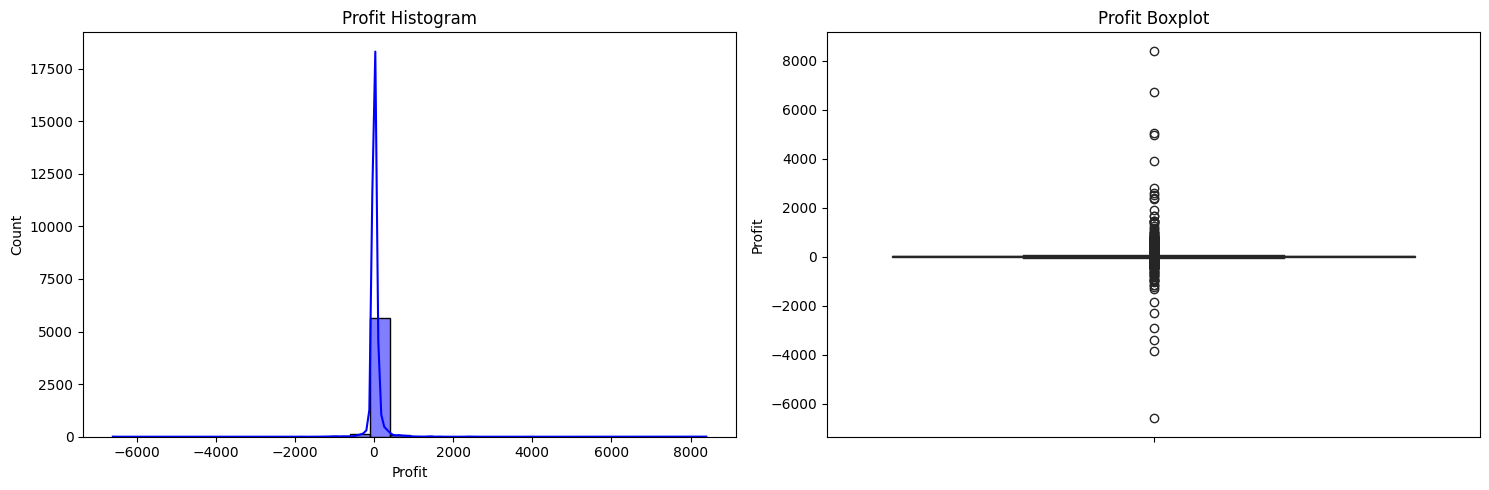

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_num['Profit'], bins=30, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Profit Histogram')

sns.boxplot(df_num['Profit'], ax=axes[1], color='green')
axes[1].set_title('Profit Boxplot')

plt.tight_layout()
plt.show()

Análise:
- A distribuição é fortemente concentrada em torno do valor zero, entre os quartis 25% -> 1.79 e 75% ->28.615.
- Existem alguns casos de lucros bastante elevados e perdas significativas.

Os gráficos sugerem que a maioria das operações tem um lucro pequeno ou nenhum lucro, mas algumas poucas operações podem gerar grandes lucros ou grandes prejuízos

# Sales - Valor total das vendas 

In [31]:
df_num['Sales'].describe()

count    5901.000000
mean      265.345589
std       474.260645
min         0.836000
25%        71.976000
50%       128.648000
75%       265.170000
max      9099.930000
Name: Sales, dtype: float64

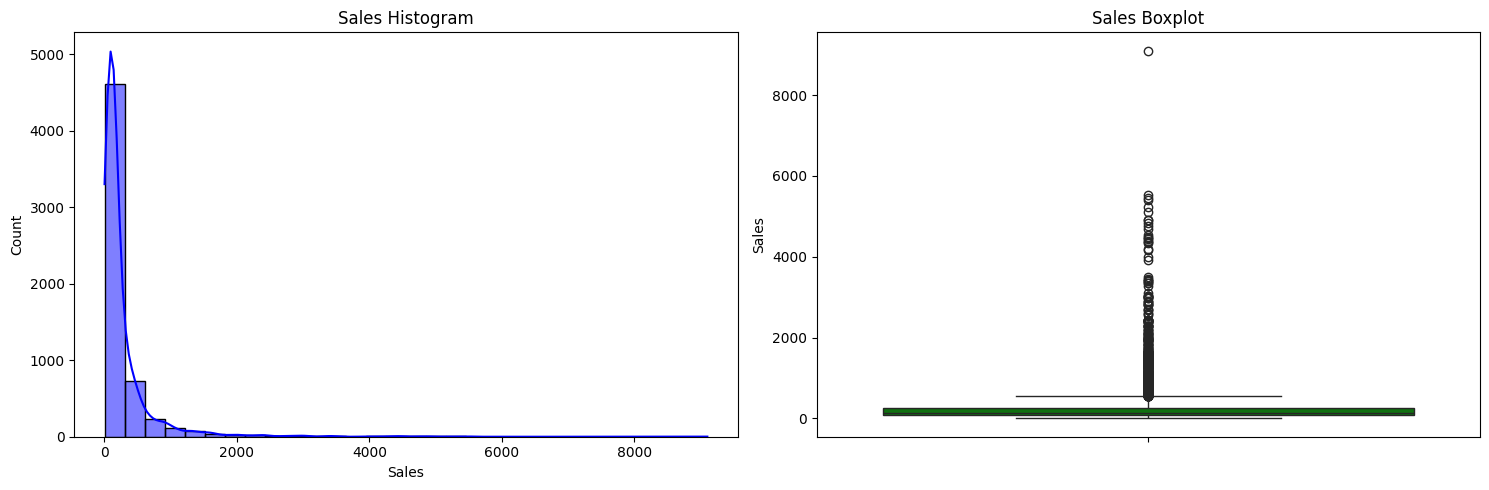

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_num['Sales'], bins=30, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Sales Histogram')

sns.boxplot(df_num['Sales'], ax=axes[1], color='green')
axes[1].set_title('Sales Boxplot')


plt.tight_layout()
plt.show()

### Análise do Sales com dados entre o quartil 5% e 95%

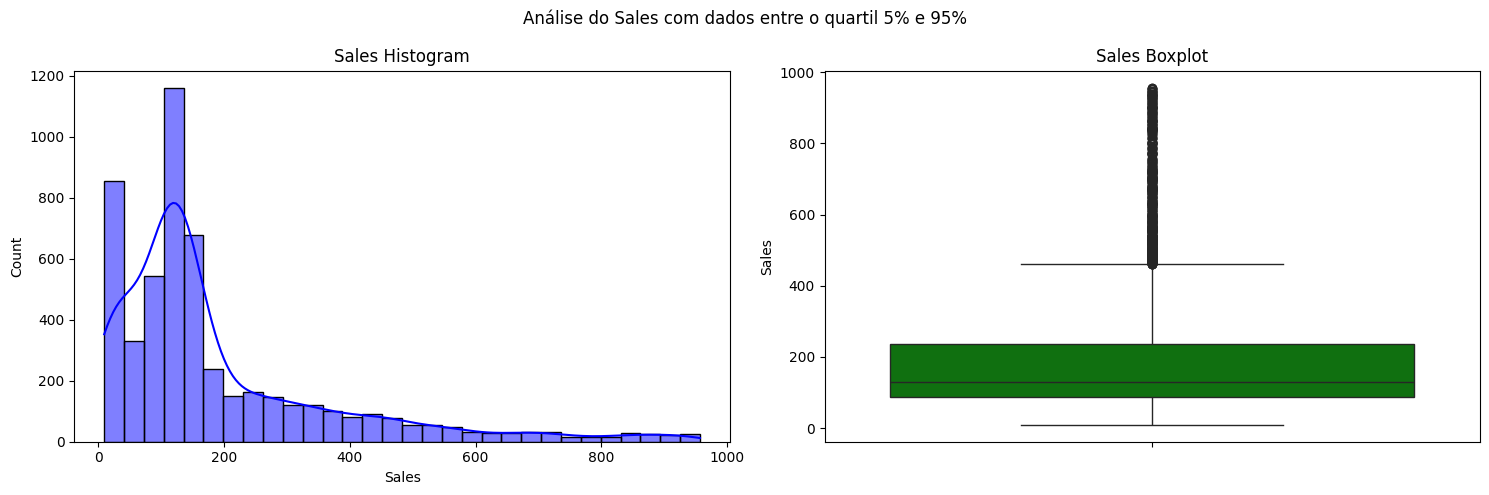

In [41]:
Q1 = df_num['Sales'].quantile(0.05)
Q3 = df_num['Sales'].quantile(0.95)

df_inter_quartil = df[(df_num['Sales'] >= Q1) & (df_num['Sales'] <= Q3)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df_inter_quartil['Sales'], bins=30, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Sales Histogram')

sns.boxplot(df_inter_quartil['Sales'], ax=axes[1], color='green')
axes[1].set_title('Sales Boxplot')

# Título da figura
plt.suptitle('Análise do Sales com dados entre o quartil 5% e 95%')

plt.tight_layout()
plt.show()

Análise:
- A maioria das vendas está concentrada em torno de 100 a 200 unidades, com uma queda suave à medida que as vendas aumentam.
- A distribuição é fortemente concentrada em torno do valor 128, entre os quartis 25% -> 71.97 e 75% ->265.17
- Existem alguns casos de vendas bastante elevados.

# Quantity - Quantidade de produtos vendidos

In [34]:
df_num['Quantity'].describe()

count    5901.000000
mean        3.781901
std         2.212917
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

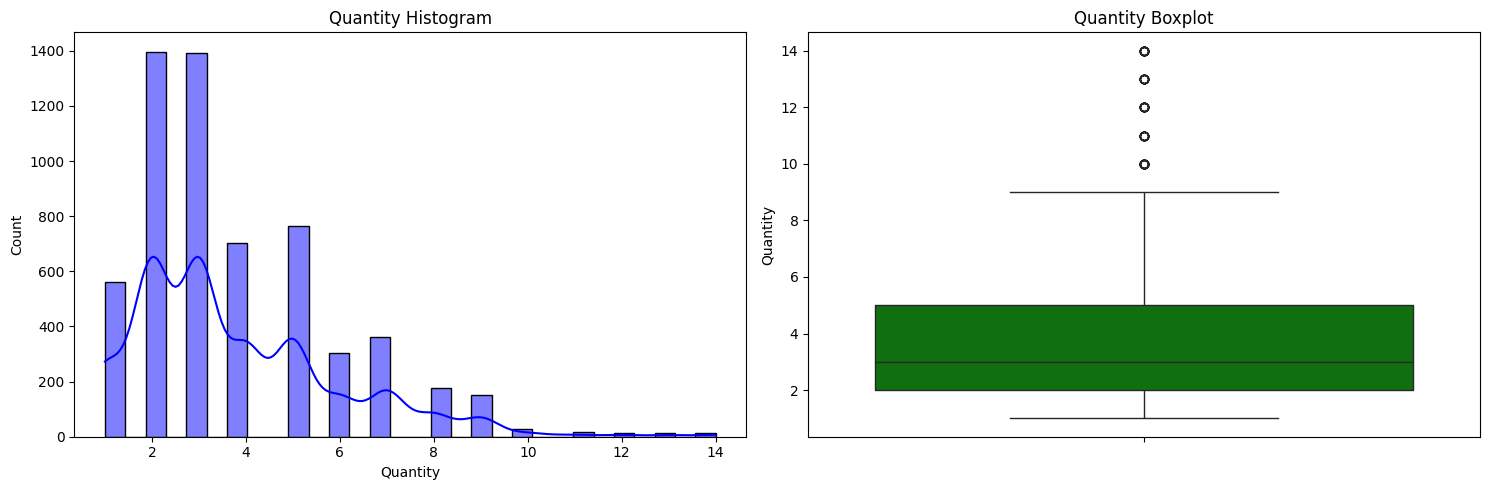

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_num['Quantity'], bins=30, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Quantity Histogram')

sns.boxplot(df_num['Quantity'], ax=axes[1], color='green')
axes[1].set_title('Quantity Boxplot')

plt.tight_layout()
plt.show()

- A maioria das transações envolve pequenas quantidades (entre 1 e 4).
- Quantidades maiores ocorrem com menos frequência, conforme indicado pela cauda longa no histograma.
- O boxplot confirma a presença de outliers de quantidades maiores, mas a maior parte dos dados está dentro do IQR.

# Comparação Sales X Quantity

<Axes: xlabel='Sales', ylabel='Quantity'>

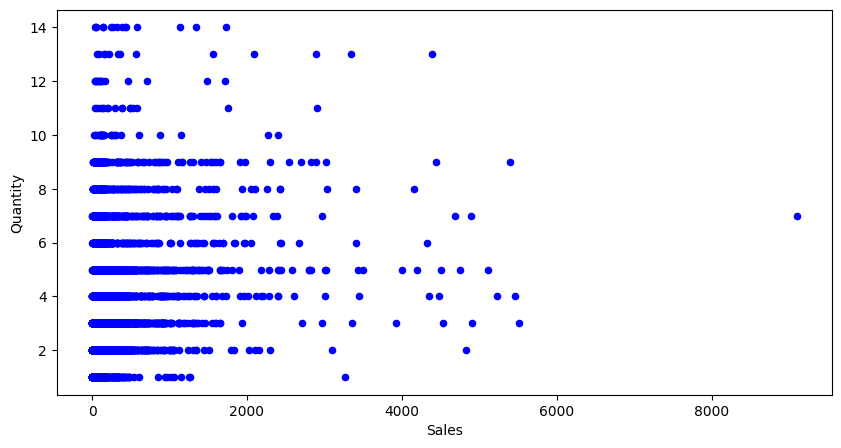

In [36]:
df_num[['Sales', 'Quantity']].plot(kind='scatter', x='Sales', y='Quantity', color='blue', figsize=(10, 5))

1 - Distribuição dos Dados:
- A maioria dos pontos está concentrada em torno de vendas baixas (abaixo de 2000) e quantidades entre 1 e 10.
Poucos pontos estão dispersos com valores de vendas mais altos (acima de 2000) e quantidades variadas.
- Há um ponto extremo isolado que tem uma venda muito alta (superior a 8000) e uma quantidade moderada (~8), o que pode indicar uma venda excepcional ou atípica.

2 - Relacionamento entre Vendas e Quantidade:
- Não há um padrão claro ou tendência linear visível no gráfico que mostre uma correlação direta entre vendas e quantidade. Isso sugere que vendas maiores nem sempre estão associadas a quantidades maiores de itens vendidos, o que pode indicar variação nos preços dos produtos ou outros fatores que influenciam o valor das vendas.
- Para quantidades baixas (1-5), parece haver uma grande variabilidade nas vendas, o que também pode refletir a diversidade de produtos e preços.

3 - Análise dos Outliers:
- Alguns outliers de vendas podem ser vistos, principalmente à direita (valores superiores a 4000), mas esses são relativamente raros.
- Esses pontos podem indicar transações únicas com valores significativamente maiores do que a maioria dos dados e merecem uma investigação mais profunda para entender o que levou a essas vendas excepcionais.

Conclusão
- A maioria dos dados está concentrada em vendas menores e quantidades entre 1 e 10.
- Não há uma correlação óbvia entre quantidade e vendas.
- Alguns outliers de vendas elevadas estão presentes, e podem representar transações excepcionais

# Comparação Sales X Profit

<Axes: xlabel='Sales', ylabel='Profit'>

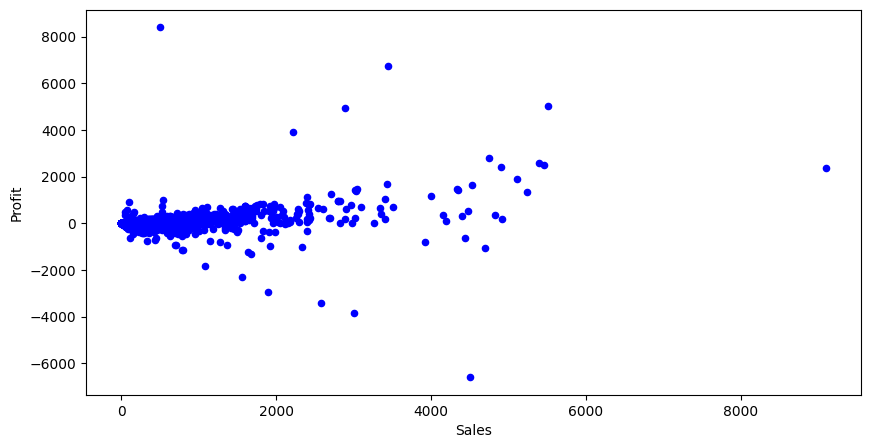

In [37]:
df_num[['Sales', 'Profit']].plot(kind='scatter', x='Sales', y='Profit', color='blue', figsize=(10, 5))

1 - Distribuição Geral:
- A maioria dos pontos está concentrada em níveis de vendas abaixo de 2000, com lucros variando em torno de zero, mas com uma densidade maior de pontos na faixa positiva.
- Há uma variação significativa no lucro para um intervalo relativamente estreito de vendas, com alguns pontos mostrando lucros negativos.

2 -Lucros Negativos:
- Existem várias observações com lucros negativos, particularmente visíveis entre 0 e 2000 em vendas, o que indica que certas vendas podem estar incorrendo em perdas, mesmo em faixas de vendas relativamente baixas.
- Observações mais distantes do eixo zero, como aquelas com lucros menores que -6000, sugerem que algumas transações resultaram em perdas significativas.

3 - Lucros Positivos:
- Em geral, observa-se uma tendência de lucro positivo para vendas maiores. À medida que o valor de vendas aumenta, parece haver uma maior probabilidade de se obter lucros, como indicado pelos pontos que se movem mais para cima no gráfico.
- Há um ponto extremo isolado, com vendas superiores a 8000 e um lucro positivo substancial, o que indica uma transação excepcionalmente lucrativa.

4 - Tendência Geral:
- Para vendas superiores a 2000, observa-se uma maior dispersão nos lucros, mas a tendência parece sugerir que transações com vendas mais altas tendem a gerar lucros mais positivos, embora ainda haja variabilidade.